In [2]:
!pip install fsspec==2023.6.0 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-runtime-cu12 12.5.82 which is incomp

In [1]:
!pip install datasets --quiet

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the emotion dataset
dataset = load_dataset("dair-ai/emotion", split="train")

# Convert to DataFrame for easier use
df = pd.DataFrame(dataset)
df.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ValueError: Invalid pattern: '**' can only be an entire path component

In [1]:
!pip install datasets --quiet

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset("dair-ai/emotion", split="train")
df = pd.DataFrame(dataset)
df.head()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [2]:
df['label'].value_counts()


,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [6]:
# Load label names like ['sadness', 'joy', ...]
emotion_labels = dataset.features['label'].names

# Map numeric labels to names
df['emotion'] = df['label'].apply(lambda x: emotion_labels[x])


In [7]:
df['emotion'].value_counts()


,count
emotion,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


In [8]:
# Keep 150 samples of minority class "surprise"
minority_class = df[df['emotion'] == 'surprise'].sample(n=150, random_state=42)

# Keep all other classes
majority_classes = df[df['emotion'] != 'surprise']

# Combine and shuffle
imbalanced_df = pd.concat([minority_class, majority_classes])
imbalanced_df = imbalanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


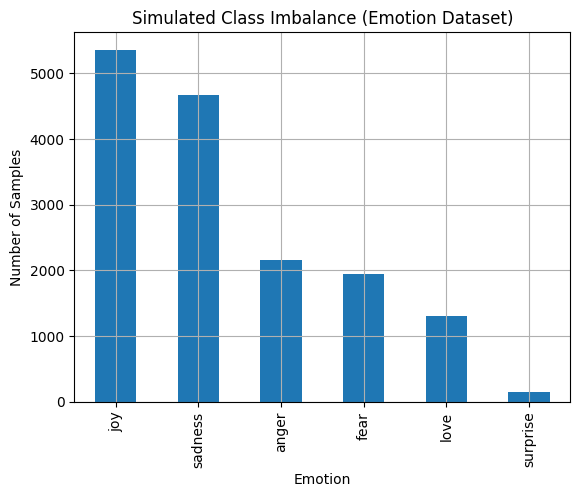

In [9]:
imbalanced_df['emotion'].value_counts().plot(kind='bar')
plt.title('Simulated Class Imbalance (Emotion Dataset)')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()
